# Fairness in Data Science (2025 Edition)

## 1. Defining Fairness

**Scenario: College Admissions**
Suppose for simplicity we are considering an alternate Earth inhabited by two races: **Circles** (2/3 majority) and **Squares** (1/3 minority). We are training an algorithm to decide college admissions based on historical "success" data. ![Circles and Squares](circle_square.png)

For this example, we will ultimately try to train a model that can make decisions about college admissions. It’s not infeasible to imagine an admissions committee trying to rely on an algorithm to help them decide. They might think relying on an algorithm can remove human bias, thus improving outcomes for their students. We’ll come back to the idea of if an algorithmic solution will actually guarantee a lack of bias.

If we want to model college admissions, we likely need to have some definition of what students we want to admit. We will assume we have some historical data on who was “successful” in college and try to make predictions about new students having that success. This example can be agnostic to how you define success (e.g., it could be just graduating, or getting a job after college) but we assume we are working with some definition of success for our future applicants, and we don’t know that true label yet.

Our data will be an SAT score for each person (shown as their position on a number line) shown in the image below. For each person, we know their race (Circle/Square), but we will not use that in our decision process explicitly. We also know the true label (successful + or not - based on our definition of success) for all these historical examples. Our goal is to come up with a rule solely based on SAT scores to make the most accurate prediction of success that we can.

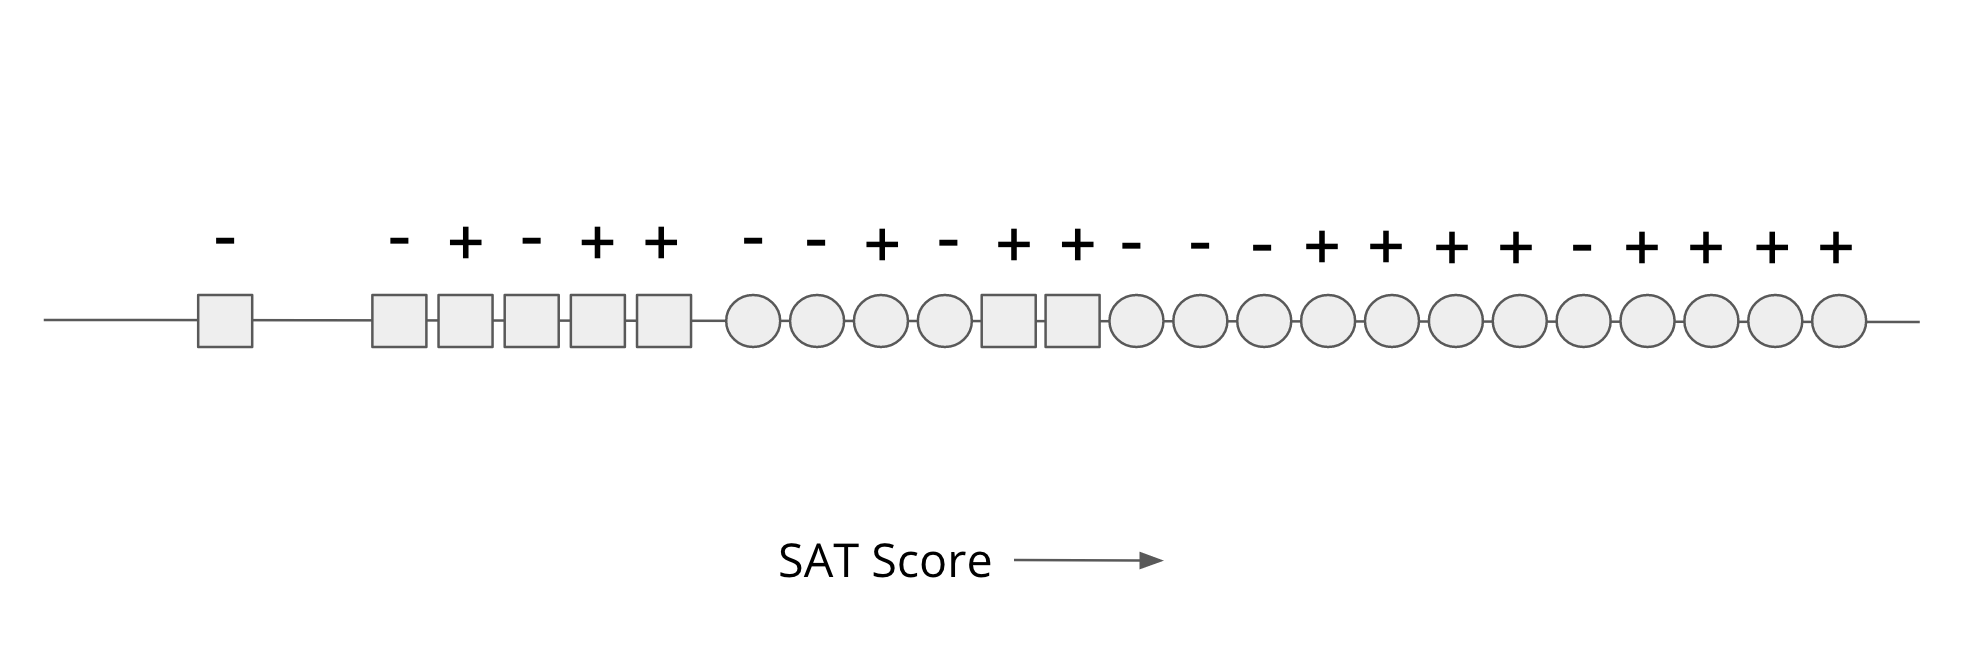

### A First Attempt: "Shape-blindness"

One might assume that simply removing the "Race" variable (Circle/Square) from the input would prevent discrimination.

* **The Reality:** Modern research confirms that "blindness" is rarely effective. Race correlates with other features (zip codes, browsing habits, school quality). Even without a "Race" label, a model often will effectively "reconstruct" protected attributes from the remaining data.

Instead, a common practice for defining fairness is on the outputs or decisions of the process/algorithm rather than restriction of the inputs. In the following sections, we will define some possible ways to define fairness based on the outputs of our college admissions model.

### Definition 1: Statistical Parity

* **Definition:** The fraction of Squares admitted must match the fraction of Circles admitted (e.g., both groups get a 30% admission rate).
* **Modern Critique (2025):** While easy to measure, Statistical Parity is often criticized for being "causally blind." It doesn't ask *why* a disparity exists. If one group had less access to resources, equalizing the *outcome* might ignore the underlying *injustice* or, conversely, force the admission of less-qualified candidates just to meet a quota.

### Definition 2: Equal Opportunity (False Negative Rate)

* **Definition:** The percent of "successful" applicants who are wrongly rejected must be equal across groups. A false negative is when we predicted a negative result (e.g., “not successful”) when the true label was positive. Commonly, we refer to the false-negative rate as the ratio of examples that are truly positive that got falsely labeled as negatives.
* **Intuition:** If you are a Circle and you are qualified, you should have the same chance of being admitted as a qualified Square. This focuses on preventing "harms of omission."

### Definition 3: Predictive Equality (False Positive Rate)

* **Definition:** The rate of "wrongly admitting" people who won't succeed is equal across groups.
* **Context Choice:** Choosing between Equal Opportunity and Predictive Equality is a value judgment. In medical AI, we care more about Equal Opportunity (not missing a sick person). In criminal justice, we may care more about Predictive Equality (not wrongly accusing an innocent person).

---

## 2. The Accuracy-Fairness Tradeoff

In a perfect world, a model would be 100% accurate and 100% fair. In practice, imposing fairness constraints often reduces the overall accuracy of the model.

### The Pareto Frontier

Imagine a graph where the x-axis is **Error** and the y-axis is **Unfairness**.

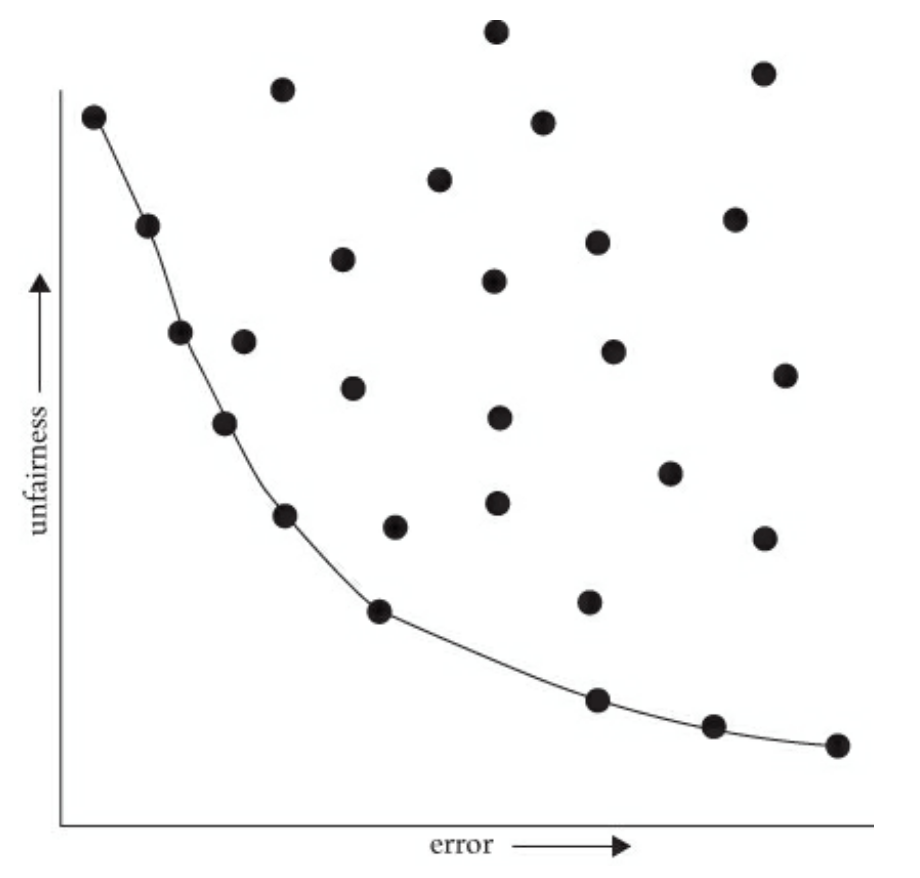

* **The Curve:** The Pareto Frontier represents the set of "best possible" models. To move toward a fairer model (down the y-axis), you almost always have to accept more error (moving right on the x-axis).
* **Update for 2025:** Recent research (e.g., *AAAI 2025*) suggests that the "Tradeoff" is sometimes an artifact of **poor data quality** for minority groups [NYU Possibility of Fairness](https://www.youtube.com/watch?v=TJJxidzmCsY). By focusing on "Data-Centric AI" - specifically collecting better, more representative data for the Squares - we can sometimes move the entire Frontier, improving both accuracy and fairness simultaneously.

---

## 3. Worldviews and Limitations

### Construct vs. Observed Space

* **Construct Space:** The abstract qualities we care about (intelligence, grit).
* **Observed Space:** The data we have (SAT scores).
* **The Gap:** If the SAT score is a biased measurement of intelligence, our model is "fairly" processing "unfair" data.

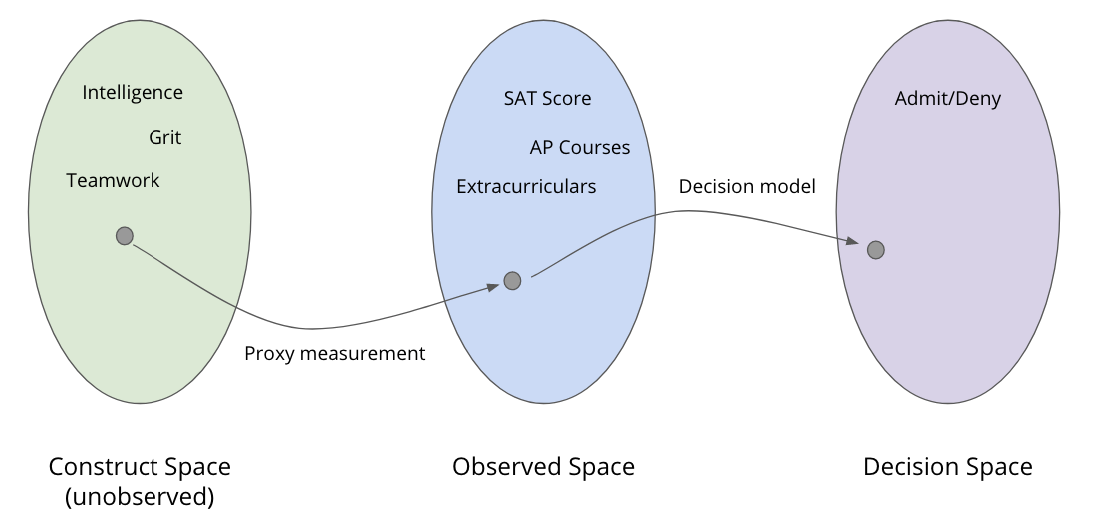

### Two Conflicting Worldviews

1. **WYSIWYG (What You See Is What You Get):** Assumes SAT scores *correctly* reflect intelligence. Here, "Individual Fairness" (treating similar scores similarly) is the goal.
2. **Structural Bias / WAE (We’re All Equal):** Assumes any difference in SAT scores between Circles and Squares is due to systemic bias (e.g., Squares couldn't afford tutors). Here, "Group Fairness" (correcting the scores) is the goal.

**Take-away: The Human Responsibility in AI**

Your choice of worldview—whether you assume "What You See Is What You Get" (WYSIWYG) or "We’re All Equal" (WAE)- directly dictates how you define fairness and how you build your models. While this lesson doesn't provide a single "correct" answer, it highlights that fairness is a choice, not a default.

The field of algorithmic fairness is remarkably young. One of its foundational papers, “Fairness through Awareness,” was published only in 2011. In the short time since, we have moved from simple mathematical definitions to complex discussions about Causal Fairness and Intersectionality. Today, these concepts are no longer just academic—they are being encoded into global laws like the EU AI Act, making fairness a mandatory part of a data scientist's job.

_The core lesson is this_: Algorithms cannot solve social problems on their own. The current state of AI constantly reaffirms the need for human oversight. As a practitioner, you must be explicit about the assumptions you make regarding the world. By asking deep questions about where your data comes from and whom it might leave behind, you ensure that the systems you build serve everyone equitably.

---

## 4. [NEW 2025] Modern Frontiers in Fairness

### A. Intersectionality: The "Square-Circle" Problem

Original fairness models looked at one trait at a time (Race *or* Gender).

* **The Update:** Modern thinking (e.g., *Intersectional Feminist Theory in AI, 2025*) argues that a model might be fair to "Squares" and fair to "Women," but highly discriminatory against **"Square Women."** We must now audit for overlapping identities to ensure fairness doesn't "leak" through the cracks.

### B. Causal Fairness

Instead of just looking at the *numbers*, we now use **Causal Diagrams**.

* **The Question:** If being a "Square" leads to "Lower SAT" which leads to "Rejection," is that path fair?
* **The Shift:** We now distinguish between **"fair pathways"** (e.g., working hard leads to success) and **"unfair pathways"** (e.g., race leading to lower resource access).

### C. Generative AI and "First-Person" Fairness

Originally society focused on "Classification" (Admit/Deny).

* **The Update:** With the rise of LLMs (like Gemini or GPT), fairness is about **content generation**. If an AI writes a "professional" email for a Circle but a "condescending" one for a Square, it has failed a fairness test. This is called **"Representational Harm."**

### D. The Regulatory Shift: EU AI Act (2024-2025)

Fairness is no longer just a "recommendation."

* **The Law:** Under the **EU AI Act**, high-risk systems (like education and hiring) are **legally required** to perform bias testing and mitigation.
* **The Impact:** Data scientists must now keep "Fairness Logs" and be able to explain their choice of a specific point on the Pareto Frontier to government regulators.